# <a href="https://thetahat.ru/courses/ph-ds-2024-aut">Phystech@DataScience</a>
## Домашнее задание 11

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 — 20 баллов — верно рассчитан итоговый объем выборки, для которого возможно проведение АВ-теста
* Задача 2 — 30 баллов — правильная итоговая формула, наличие промежуточных выкладок и объяснения переходов

<b><font color="orange">Cложная часть</font></b> (необходимо на "отл"):
* Задача 3 — 70 баллов

-----

In [74]:
# Bot check

# HW_ID: phds_hw11
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [1]:
import scipy.stats as sps
import numpy as np
import pandas as pd
from tqdm import tqdm
from datetime import datetime, timedelta

from statsmodels.stats.proportion import proportion_confint

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

## Задача 1

*Примечание для обоих профилей*: величину уровня значимости $\alpha$ и минимально необходимой мощности $\beta$ считать стандартными и равными **0.05** и **0.8** соответственно.

In [76]:
DATA_PATH = '/content/Train_Data.csv'

data = pd.read_csv(DATA_PATH)['charges'].values
data

array([ 3279.86855   , 21454.49423864,  1720.3537    , ...,
       10602.385     ,  8976.14045154,  7027.69896823])

In [77]:
data.shape

(3630,)

Зафиксируем параметры уровня значимости, желаемой мощности и величины эффекта.

In [78]:
alpha = 0.05  # уровень значимости
beta = 0.8  # мощности
mde = 600  # размер эффекта

Вычислите необходимый размер выборки, воспользовавшись формулами с семинара.

In [79]:
z_alpha = sps.norm.ppf(1 - alpha / 2)
z_beta = sps.norm.ppf(beta)

sigma = np.std(data)

n = (z_alpha + z_beta)**2 * 2*sigma**2 / mde**2

print(int(np.floor(n)))

5034


Достаточно ли у вас клиентов для исследования?

**Ответ:** нет. у нас 3630 клиентов


Посмотрите на распределение суммы страховки.

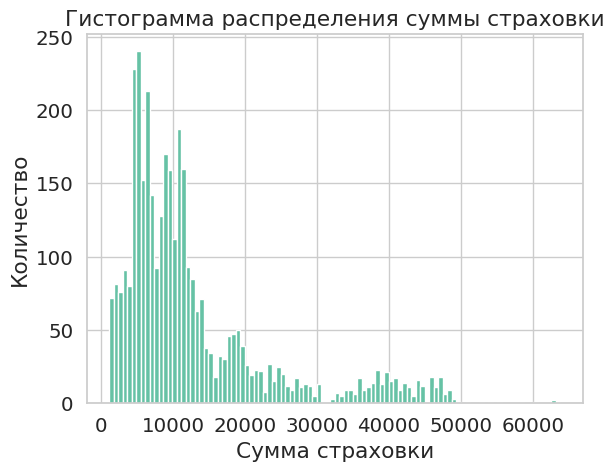

In [80]:
plt.title(fr'Гистограмма распределения суммы страховки')
plt.hist(data, bins=100)
plt.xlabel('Сумма страховки')
plt.ylabel('Количество');

Видим, что есть выбросы, завышающие нам дисперсию. Выполните фильтрацию данных.

**Внимание! Определять параметры фильтрации выбросов можно только на основе данных ДО эксперимента. Удаление на основании экспериментальным данных может привести к большим ошибкам.**

визуально большинство данных до 27000

In [81]:
data_filtered = data[data <= 27000]

In [82]:
data_filtered.shape

(3239,)

Посчитайте, сколько нужно клиентов в данном случае.

In [83]:
z_alpha = sps.norm.ppf(1 - alpha / 2)
z_beta = sps.norm.ppf(beta)

sigma = np.std(data_filtered)

n = (z_alpha + z_beta)**2 * 2*sigma**2 / mde**2

print(int(np.floor(n))) # ваш код

1337


теперь хватает!

Как зависит требуемый размер выборки в исследовании от размера эффекта? Постройте график размера выборки от `MDE` для ожидаемой в нашем исследовании дисперсии.

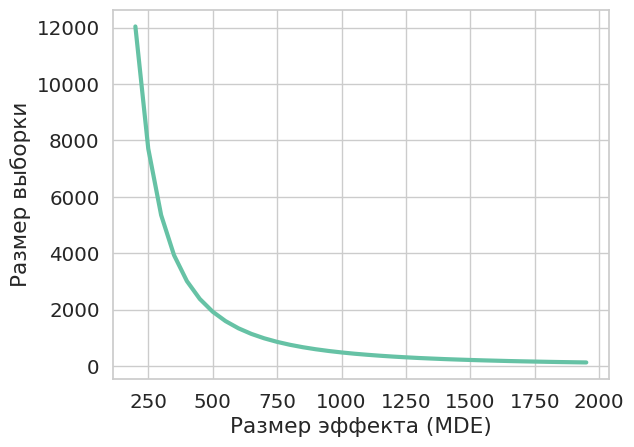

In [84]:
mde_grid = np.arange(200, 2000, 50)
n_grid = []
for mde in mde_grid:
    n = (z_alpha + z_beta)**2 * 2*sigma**2 / mde**2
    n_grid.append(int(np.floor(n))) # ваш код

plt.plot(mde_grid, n_grid, lw=3)
plt.xlabel('Размер эффекта (MDE)')
plt.ylabel('Размер выборки');

Какой минимальный эффект можно зафиксировать с нашей выборкой?

In [87]:
mde = (z_alpha + z_beta) * np.sqrt(2*sigma**2 / 3239)
mde

385.61311351641535

**Ответ:** выше

**Итоговый вывод по задаче:** мы нашли необходимый размер выборки для проведения AB-теста новых рекомендаций по употреблению витаминов. фильтрация выбросов позволили более точно оценить требуемый размер выборки, и оказалось, что мы можем провести этот тест в условиях нашего эксперимента.

## Задача 2

Выведите формулу `MDE` для относительного t-test. Рассмотрите случаи односторонней и двусторонней гипотез.







Мощность теста определяется вероятностью того, что статистика $T$ превышает критическое значение $ t_{\text{crit}} $ при условии, что истинный эффект равен $ \epsilon $.

Односторонний тест
$1 - \beta = P_{H_1} \left( T(X, Y) > z_{1-\alpha} \right) \geq \beta$


$ P_{H_1} \left( \frac{\bar{X} - \bar{Y}}{\sqrt{\frac{\sigma^2_1}{n} + \frac{\sigma^2_2}{m}}} > z_{1-\alpha} \right) \geq \beta  $

$ P_{H_1} \left(\frac{\bar{X}-\bar{Y}-\epsilon}{\sqrt{\frac{\sigma^2_1}{n} + \frac{\sigma^2_2}{m}}} > z_{1-\alpha} - \frac{\epsilon}{\sqrt{\frac{\sigma^2_1}{n} + \frac{\sigma^2_2}{m}}} \right) \geq \beta $

$ P \left( Z > z_{1-\alpha} - \frac{\epsilon}{\sqrt{\frac{\sigma^2_1}{n} + \frac{\sigma^2_2}{m}}} \right) \geq \beta $

$ z_{1-\beta} \leq z_{1-\alpha} - \frac{\epsilon}{\sqrt{\frac{\sigma^2_1}{n} + \frac{\sigma^2_2}{m}}} $

$ \frac{\epsilon}{\sqrt{\frac{\sigma^2_1}{n} + \frac{\sigma^2_2}{m}}} \leq z_{1-\alpha} - z_{1-\beta} $

$ \epsilon \geq (z_{1-\alpha} + z_{\beta}) \cdot \sqrt{\frac{\sigma^2_1}{n} + \frac{\sigma^2_2}{m}} $

Двусторонний тест

$ 1 - \beta = P_{H_1} \left( |T(X, Y)| > z_{1-\alpha/2} \right) \geq \beta $

$ P_{H_1} \left( \left| \frac{\bar{X} - \bar{Y}}{\sqrt{\frac{\sigma^2_1}{n} + \frac{\sigma^2_2}{m}}} \right| > z_{1-\alpha/2} \right) \geq \beta $

$ P_{H_1} \left( \left| \frac{\bar{X} - \bar{Y} - \epsilon}{\sqrt{\frac{\sigma^2_1}{n} + \frac{\sigma^2_2}{m}}} \right| > z_{1-\alpha/2} - \frac{\epsilon}{\sqrt{\frac{\sigma^2_1}{n} + \frac{\sigma^2_2}{m}}} \right) \geq \beta $

$ P \left( |Z| > z_{1-\alpha/2} - \frac{\epsilon}{\sqrt{\frac{\sigma^2_1}{n} + \frac{\sigma^2_2}{m}}} \right) \geq \beta $

$ z_{1-\beta} \leq z_{1-\alpha/2} - \frac{\epsilon}{\sqrt{\frac{\sigma^2_1}{n} + \frac{\sigma^2_2}{m}}} $

$ \frac{\epsilon}{\sqrt{\frac{\sigma^2_1}{n} + \frac{\sigma^2_2}{m}}} \leq z_{1-\alpha/2} - z_{1-\beta} $

$ \epsilon \geq (z_{1-\alpha/2} + z_{\beta}) \cdot \sqrt{\frac{\sigma^2_1}{n} + \frac{\sigma^2_2}{m}} $


## Задача 3


### **Профиль физика**

Квантовые компьтеры состоят из кубитов, каждый из которых по отдельности можно представить в виде единичного вектора на сфере. Считывание состояние кубита — это получение проекции этого вектора на ось $z$, причём, считав состояние один раз, мы получаем детерменированное значение: 0 или 1. Таким образом, для получения значения проекции с определённой точностью мы усредняем некоторое количество считываний.

В данной задаче мы будем генерировать выборку из распределения Бернулли, симулируя проекции, получаемые от кубита. Наша задача — исследовать минимальный размер выборки для разных значений разделения состояний.


Выберите или оцените каким-нибудь способом:

1. Статистический критерий (название / односторонний или двусторонний / связные или независимые выборки);

2. Размеры A и B групп;

3. Желаемый минимальный детектируемый эффект;

4. Мощность критерия.

Обоснуйте свой выбор в каждом из пунктов.


> Статистический критерий (название / абсолютный или относительный / односторонний или двусторонний / связные или независимые выборки);

**Ответ:**


> Мощность критерия

**Ответ:**

> Желаемый минимальный детектируемый эффект;

> Размер А и В групп;

Будем подбирать по таблице `MDE`-мощность-размер выборки

In [86]:
def get_mde(alpha, beta, sample_size, var_x, var_y=var_x):
    '''Расcчитывает MDE

    Аргументы:
    alpha -- желаемая ошибка первого рода
    beta -- желаемая мощность
    sample_size -- размер выборок
    var_x, var_y -- дисперсии выборок

    Возвращает:
    mde -- теоретический MDE
    '''

    <...>

    return mde


def get_sample_size(alpha, beta, mde, var_x, var_y=var_x):
    '''Расcчитывает размер выборки для детектирование MDE

    Аргументы:
    alpha -- желаемая ошибка первого рода
    beta -- желаемая мощность
    mde -- необходимый эффект
    var_x, var_y -- дисперсии выборок

    Возвращает:
    n -- теоретический минимальный размер выборки
    '''

    <...>

    return n

SyntaxError: invalid syntax (<ipython-input-86-ec41209261dd>, line 14)

Создадим датасеты для разных значений проекций с помощью распределения Бернулли. Задайте размер выборок $size=2000$.

In [ ]:
data = np.array([<...> for i in np.linspace(0.3, 0.8, 6)]) # возьмём центральные значения проекций

Вычислим значения таблицы `MDE`-мощность-размер выборки.

In [ ]:
mde_grid = np.arange(0.01, 0.1, 0.01).reshape(-1, 1)  # абсолютный MDE
beta_grid = np.arange(0.6, 1, 0.05)  # мощность
alpha = <...> # выбранный теоретический уровень значимости
var = <...> # дисперсия, расчет зависит от выбранного типа теста: абсолютный или относительный

sample_sizes = <...>

Посмотрим для крайних и центрального значений, как выглядит таблица.

In [ ]:
pd.DataFrame(sample_sizes[0], columns=beta_grid.reshape(-1), index=mde_grid.reshape(-1))

In [ ]:
pd.DataFrame(sample_sizes[2], columns=beta_grid.reshape(-1), index=mde_grid.reshape(-1))

In [ ]:
pd.DataFrame(sample_sizes[5], columns=beta_grid.reshape(-1), index=mde_grid.reshape(-1))

Какой размер детектируемого эффекта мы возьмём и какой для него необходим размер выборок?

**Ответ:**



Для выбранного критерия проведите АА-тест по сгенерированным данным.

In [ ]:
new_data = sps.bernoulli.rvs(0.5, size=<...>)

In [ ]:
sample_size = <...>
mde = <...>
alpha = <...>

In [ ]:
p_vals = []

for i in tqdm(range(2000)):

    sample1, sample2 = np.random.choice(<...>, (2, sample_size), replace=False)

    p_val = <...>
    p_vals.append(p_val)

p_vals = np.array(p_vals)

In [ ]:
def draw_interval(
    real_alpha, left_bound, right_bound,
    alpha=0.05, new_fig=True
):
    '''
    Отрисовка интервала для вероятности отвержения критерия

    Аргументы:
    real_alpha -- оценка реального уровня значимости
    left_bound, right_bound -- границы дов. интервала
    alpha -- теоретический уровень значимости
    new_fig -- coздавать ли новую matplotlib figure
    '''

    if new_fig:
        plt.figure(figsize=(7, 3.5))

    plt.hlines(0, 0, 1,
               color='black', lw=2, alpha=0.6)
    plt.vlines(alpha, -1, 1,
               color='red', lw=2, linestyle='--', alpha=0.6)
    plt.fill_between([left_bound, right_bound], [0.1]*2, [-0.1]*2,
                     color='green', alpha=0.6)
    plt.scatter(real_alpha, 0, s=300, marker='*', color='red')
    plt.xlim((min(alpha, left_bound)-1e-3, max(alpha, right_bound)+1e-3))
    plt.title(
            f'Доля отвержений = {100*real_alpha:.2f}%, '
            f'интервал ({100*left_bound:.2f}%, {100*right_bound:.2f}%)'
        )
    plt.ylim((-0.5, 0.5))
    plt.yticks([])

In [ ]:
real_alpha = (p_vals < alpha).mean()
print(f'Реальный уровень значимости: {real_alpha.round(2)}')
left_alpha, right_alpha = proportion_confint((p_vals < alpha).sum(), len(p_vals), method='wilson')
draw_interval(real_alpha, left_alpha, right_alpha, alpha=alpha)

Посмотрите на гистограмму p-value.

Какие выводы о валидности выбранного критерия вы можете сделать?

**Ответ:**


Проверьте также мощность критерия на выбранном MDE

In [ ]:
pvals = []

for _ in tqdm(range(2000)):
    sample1, sample2 = np.random.choice(<...>, (2, sample_size), replace=False)

    sample2 = <...> # группа с заданным эффектом
    sample2 += sps.norm.rvs(size=len(sample2), scale=0.1)

    pvals.append(<...>)

pvals = np.array(pvals)

In [ ]:
print(f'Реальная мощность критерия: {(pvals < alpha).mean().round(3)}')

**Итоговый вывод по задаче:**

### **Профиль биология**

В одной фармацевтической компании собираются проводить II фазу клинических испытаний нового лекарства, ослабляющего симптомы диабета. Перед командой аналитики стоит задача о корректном проведении AB-тестирования. У вас имеются исторические [данные по пациентам](https://www.kaggle.com/datasets/jillanisofttech/diabetes-disease-updated-dataset?select=diabetes.csv), страдающим диабетом. С помощью них проведите дизайн эксперимента.


Выберите или оцените каким-нибудь способом:

1. Таргет клинических испытаний (первичную контрольную точку): уровень глюкозы, инсулина, толщину кожи и т.д.;

2. Статистический критерий (название / односторонний или двусторонний / связные или независимые выборки);

3. Размеры A и B групп;

4. Желаемый минимальный детектируемый эффект;

5. Мощность критерия.

Обоснуйте свой выбор в каждом из пунктов.

Все ли полученные показатели вас устраивают? Если нет, то какие могут быть способы их улучшить?

*Примечание.* Если кажется, что информации недостаточно, сделайте свои дополнительные предположения, коррелирующие с реальностью, и работайте с ними.


Для выбранного критерия проведите АА-тест по историческим данным. Если исторических данных оказалось недостаточно для вашей модели, придумайте способ решения проблемы.

In [2]:
DATA_PATH = '/content/diabetes 2.csv'

data = pd.read_csv(DATA_PATH)
data = data[data['Outcome']==1]
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


Выберите, обоснуйте и визуализируйте:

> Таргет клинических испытаний (первичную контрольную точку): уровень глюкозы, инсулина, толщину кожи и тд.;

**Ответ:** уровень глюкозы в крови - основной показатель для диагностики диабета. высокий уровень глюкозы натощак или после приема может явно показывать, что у пациента диабет.
еще уровень глюкозы легко измерить (с помощью глюкометра или лабораторных анализов крови).
также уровень глюкозы - чувствительный показатель для мониторинга состояния пациента.

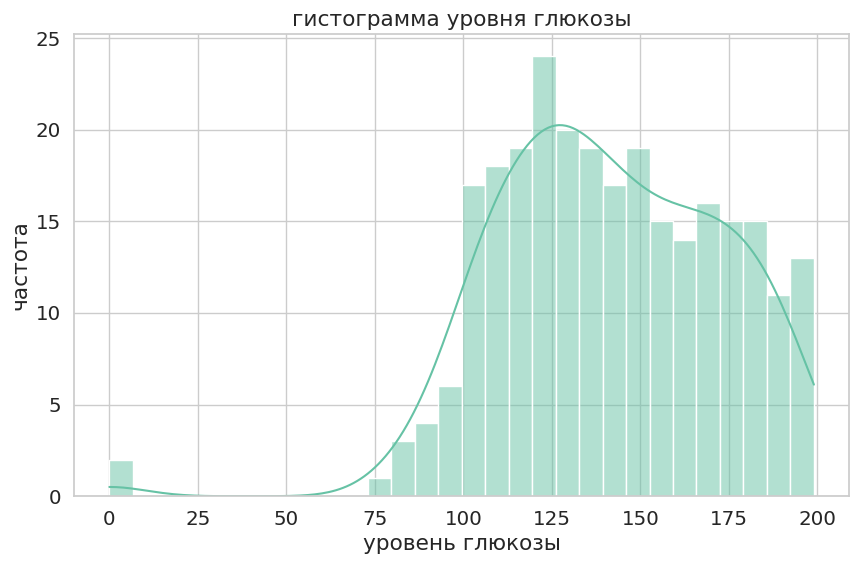

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Glucose'], kde=True, bins=30)
plt.title('гистограмма уровня глюкозы')
plt.xlabel('уровень глюкозы')
plt.ylabel('частота')
plt.show()

Посмотрите на распределение значений выбранного таргета.

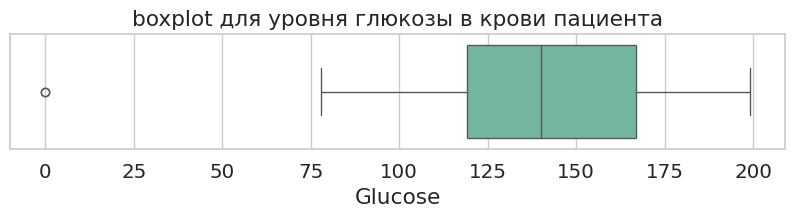

In [8]:
plt.figure(figsize=(10, 1.5))
sns.boxplot(data['Glucose'], orient='h')
plt.title('boxplot для уровня глюкозы в крови пациента')
plt.show()

> Статистический критерий (название / абсолютный или относительный / односторонний или двусторонний / связные или независимые выборки);

**Ответ:** критерий должен быть двусторонний, чтобы посмотреть уменьшается/увеличивается уровень глюкозы после лекарства.

выборки связные: возьмум группу пациентов, померим уровень глюкозы, дадим лекарство, опять померим уровень глюкозы у тех же пациентов.

будем смотреть абсолютное значение уровня глюкозы.

критерий уилкоксона: он подойдет, потому что у насс нет определенного распределения

> Мощность критерия

**Ответ:** возьмем 0.8

> Желаемый минимальный детектируемый эффект;

так как уровень глюкозы довольно чувствительный параметр, может меняться много из-за, то возьмем mde = 20, чтобы показать, что лекарство действительно работает

> Размер А и В групп;

In [12]:
alpha = 0.05
beta = 0.8
mde = 20

z_alpha = sps.norm.ppf(1 - alpha / 2)
z_beta = sps.norm.ppf(beta)

sigma = np.std(data['Glucose'])

n = (z_alpha + z_beta)**2 * 2*sigma**2 / mde**2

print(int(np.floor(n)))

39


Будем подбирать по рассмотренной на семинаре таблице `MDE`-мощность-размер выборки

In [14]:
def get_mde(alpha, beta, sample_size, var_R, two_sided=False):
    '''Расcчитывает MDE

    Аргументы:
    alpha -- желаемая ошибка первого рода
    beta -- желаемая мощность
    sample_size -- размер выборок
    var_R -- дисперсии выборок
    two_sided -- двусторонний или односторонний тест

    Возвращает:
    mde -- теоретический MDE
    '''

    if two_sided:
        z_alpha = sps.norm.ppf(1 - alpha / 2)
    else:
        z_alpha = sps.norm.ppf(1 - alpha)

    z_beta = sps.norm.ppf(beta)

    mde = (z_alpha + z_beta) * np.sqrt(2 * var_R / sample_size)

    return mde




def get_sample_size(alpha, beta, mde, var_R, two_sided=False):
    '''Расcчитывает размер выборки для детектирование MDE

    Аргументы:
    alpha -- желаемая ошибка первого рода
    beta -- желаемая мощность
    mde -- необходимый эффект
    var_R -- дисперсии выборок
    two_sided -- двусторонний или односторонний тест

    Возвращает:
    n -- теоретический минимальный размер выборки
    '''

    if two_sided:
        z_alpha = sps.norm.ppf(1 - alpha / 2)
    else:
        z_alpha = sps.norm.ppf(1 - alpha)

    z_beta = sps.norm.ppf(beta)

    n = ((z_alpha + z_beta) ** 2) * (2 * var_R) / (mde ** 2)

    return n

In [16]:
mde_grid = np.arange(0.01, 0.1, 0.01).reshape(-1, 1)  # относительный MDE
beta_grid = np.arange(0.6, 1, 0.05)  # мощность
alpha = 0.05 # выбранный теоретический уровень значимости

# Дисперсия (варианса) относительных изменений
var = 1  # дисперсия, расчет зависит от выбранного типа теста: абсолютный или относительный

sample_sizes = get_sample_size(alpha, beta_grid, mde_grid, var, two_sided = True)
pd.DataFrame(sample_sizes, columns=beta_grid.reshape(-1), index=mde_grid.reshape(-1))

,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95
0.01,97974.919417,110007.183117,123441.339104,138806.929609,156977.594687,179567.944462,210148.461229,259894.200242
0.02,24493.729854,27501.795779,30860.334776,34701.732402,39244.398672,44891.986116,52537.115307,64973.550061
0.03,10886.102157,12223.020346,13715.704345,15422.992179,17441.954965,19951.993829,23349.829025,28877.133360
0.04,6123.432464,6875.448945,7715.083694,8675.433101,9811.099668,11222.996529,13134.278827,16243.387515
0.05,3918.996777,4400.287325,4937.653564,5552.277184,6279.103787,7182.717778,8405.938449,10395.768010
0.06,2721.525539,3055.755087,3428.926086,3855.748045,4360.488741,4987.998457,5837.457256,7219.283340
0.07,1999.488151,2245.044553,2519.211002,2832.794482,3203.624381,3664.651928,4288.744107,5303.963270
0.08,1530.858116,1718.862236,1928.770923,2168.858275,2452.774917,2805.749132,3283.569707,4060.846879
0.09,1209.566906,1358.113372,1523.967149,1713.665798,1937.994996,2216.888203,2594.425447,3208.570373


**Ответ:** немного искусственная таблица, я взяла var = 1, потому что при других значениях mde был огромный.

Для выбранного критерия проведите АА-тест по историческим данным. Если исторических данных оказалось недостаточно для вашей модели, придумайте способ решения проблемы.

In [22]:
sample_size = len(data['Glucose'])//2
mde = 20
alpha = 0.05

In [33]:
p_vals = []

for i in tqdm(range(2000)):

    sample1, sample2 = np.random.choice(data['Glucose'], (2, sample_size), replace=False)

    p_val = sps.mannwhitneyu(sample1, sample2, alternative='two-sided')
    p_vals.append(p_val)

p_vals = np.array(p_vals)

100%|██████████| 2000/2000 [00:02<00:00, 709.79it/s]


In [34]:
def draw_interval(
    real_alpha, left_bound, right_bound,
    alpha=0.05, new_fig=True
):
    '''
    Отрисовка интервала для вероятности отвержения критерия

    Аргументы:
    real_alpha -- оценка реального уровня значимости
    left_bound, right_bound -- границы дов. интервала
    alpha -- теоретический уровень значимости
    new_fig -- coздавать ли новую matplotlib figure
    '''

    if new_fig:
        plt.figure(figsize=(7, 3.5))

    plt.hlines(0, 0, 1,
               color='black', lw=2, alpha=0.6)
    plt.vlines(alpha, -1, 1,
               color='red', lw=2, linestyle='--', alpha=0.6)
    plt.fill_between([left_bound, right_bound], [0.1]*2, [-0.1]*2,
                     color='green', alpha=0.6)
    plt.scatter(real_alpha, 0, s=300, marker='*', color='red')
    plt.xlim((min(alpha, left_bound)-1e-3, max(alpha, right_bound)+1e-3))
    plt.title(
            f'Доля отвержений = {100*real_alpha:.2f}%, '
            f'интервал ({100*left_bound:.2f}%, {100*right_bound:.2f}%)'
        )
    plt.ylim((-0.5, 0.5))
    plt.yticks([])

Реальный уровень значимости: 0.02


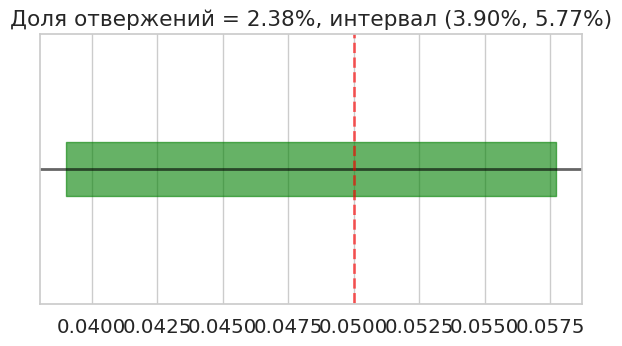

In [35]:
real_alpha = (p_vals < alpha).mean()
print(f'Реальный уровень значимости: {real_alpha.round(2)}')
left_alpha, right_alpha = proportion_confint((p_vals < alpha).sum(), len(p_vals), method='wilson')
draw_interval(real_alpha, left_alpha, right_alpha, alpha=alpha)

Посмотрите также на гистограмму p-value

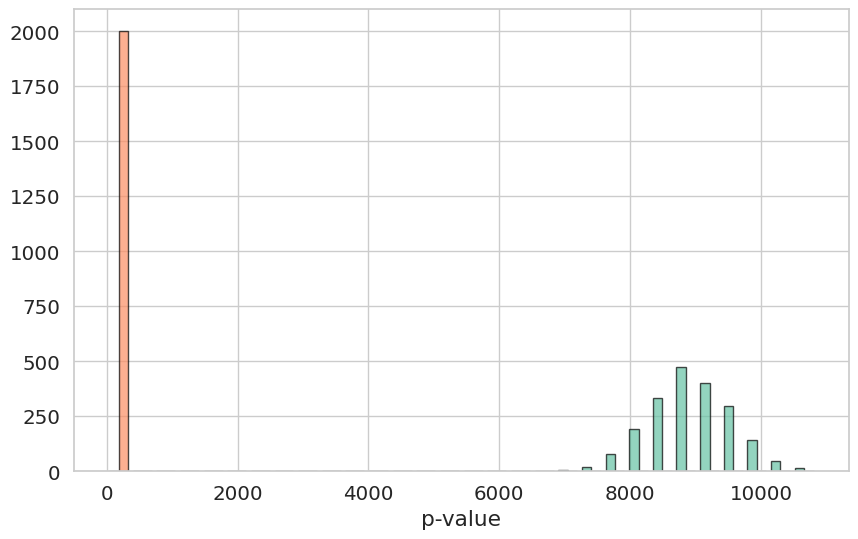

In [36]:
plt.figure(figsize=(10, 6))
plt.hist(p_vals, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('p-value')
plt.show()

Какие выводы о валидности выбранного критерия вы можете сделать?

**Ответ:** критерий не валиден, но я не очень понимаю, в чем проблема, ttest нам не подойдёт, потому что у нас нет нормального распределения.
Проверьте также мощность критерия на выбранном `MDE`.


In [30]:
pvals = []

for _ in tqdm(range(2000)):
    sample1, sample2 = np.random.choice(data['Glucose'], (2, sample_size), replace=False)

    # группа с заданным эффектом
    sample2 = sample2 + sps.norm.rvs(size=len(sample2), scale=10)
    pvals.append(sps.mannwhitneyu(sample1, sample2, alternative='two-sided') )
pvals = np.array(pvals)

100%|██████████| 2000/2000 [00:02<00:00, 743.00it/s]


In [31]:
print(f'Реальная мощность критерия: {(pvals < alpha).mean().round(3)}')

Реальная мощность критерия: 0.023


**Итоговый вывод по задаче:** делать дизайн А/В-теста непросто, нужно верно выбрать предполагаемый минимальный детектируемый эффект, достижимый размер выборки, надо делать много разных анализов, а перед экспериментомм провести А/А-тест, у меня это сделать не получилосьм:(